In [98]:
#importing packages
import pandas as pd
import numpy as np
from sklearn import metrics 
from sklearn.model_selection import train_test_split 
from sklearn.utils import resample
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

#using pandas to import the training data
processeddata=pd.read_csv(r'C:\\Users\\diyas\\Desktop\\SEM5\\Data_Analytics\\Project\\ModelBehaviour-master\\preprocessed_wosq.csv', index_col='Id')

In [99]:
#data balancing
class_names=processeddata.Target.unique()
class_names=list(class_names)
col=list(processeddata.columns)
data_notnum = list(processeddata.select_dtypes(exclude=[np.number]).columns)
col=list(filter(lambda a: a not in data_notnum, col))
col.pop(-1)
x=processeddata[col]
y=processeddata.Target
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.4, random_state=1)
train = pd.concat([x_train, y_train], axis=1)
#Seperating the majority and minority classes
#in this case the majority class is 4 (non vulnerable households)
majority=train[train.Target==4]
minority1=train[train.Target==1]
minority2=train[train.Target==2]
minority3=train[train.Target==3]
minority_upsampled1=resample(minority1, replace=True, n_samples=len(majority), random_state=1)
minority_upsampled2=resample(minority2, replace=True, n_samples=len(majority), random_state=1)
minority_upsampled3=resample(minority3, replace=True, n_samples=len(majority), random_state=1)
upsampled=pd.concat([majority,minority_upsampled1,minority_upsampled2,minority_upsampled3])
#print("Values before upsampling \n", train.Target.value_counts())
#print("Values after upsampling\n", upsampled.Target.value_counts())

In [100]:
#using Random Forest Classifier
y_train=upsampled.Target
x_train=upsampled.drop("Target",axis=1)

In [113]:
#plotting a graph to find optimum value for number of decisions(n_estimators =?) trees to be used
l=[]
for i in range(1,150):
    regressor = RandomForestClassifier(n_estimators = i, random_state = 0)
    regressor.fit(x_train, y_train)  
    y_pred= regressor.predict(x_test)
    l.append(accuracy_score(y_test, y_pred))

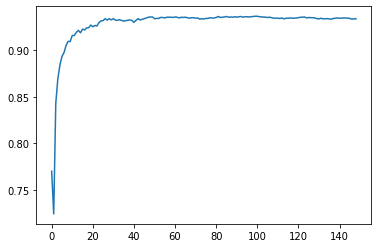

In [114]:
plt.plot(l)
#can be observed that n_estimators=50 gives approximately highest accuracy score 

In [116]:
# create classifier object with n_estimators = 50
# fit the model with x and y data 
regressor = RandomForestClassifier(n_estimators = 50, random_state = 0)
regressor.fit(x_train, y_train)  
y_pred= regressor.predict(x_test)


In [117]:
#performance metrics for random forest classifier

#printing confusion matrix
print('Confusion matrix')
print(confusion_matrix(y_test,y_pred))
print('\n')
#print(classification_report(y_test,y_pred))

#Print accuracy
print("Accuracy score")
print(accuracy_score(y_test, y_pred))

Confusion matrix
[[ 266    8    7   40]
 [  18  551    5   69]
 [   7    9  406   57]
 [   1   14   11 2354]]


Accuracy score
0.9356526288255297


In [118]:
print(metrics.f1_score(y_test, y_pred,average='macro'))

0.905636065005876
